In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

boston = load_boston()


In [19]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [94]:
X_test_scaled.mean()

CRIM       0.002462
ZN        -0.044123
INDUS      0.109307
CHAS      -0.050203
NOX       -0.075497
RM        -0.218831
AGE        0.003276
DIS       -0.030652
RAD        0.111584
TAX        0.125688
PTRATIO    0.305805
B          0.021464
LSTAT      0.136714
dtype: float64

In [95]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [40]:
X_train_tsne


array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

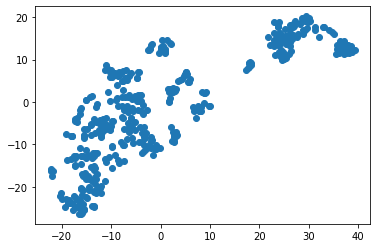

In [53]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

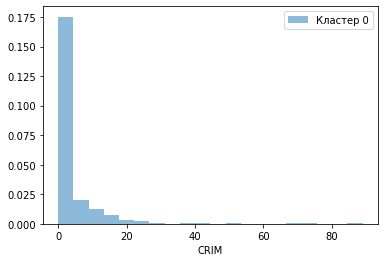

In [56]:
plt.hist(X_train.loc[:, 'CRIM'], bins=20, density=True, alpha=0.5)
#plt.xlim(0, 12)
plt.legend(['Кластер 0'])
plt.xlabel('CRIM')

plt.show()

### Задание 2

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [78]:
train_labels = model.fit_predict(X_train_scaled)
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

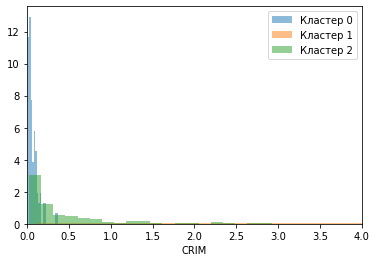

In [80]:
plt.hist(X_train.loc[train_labels == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[train_labels == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[train_labels == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 4)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

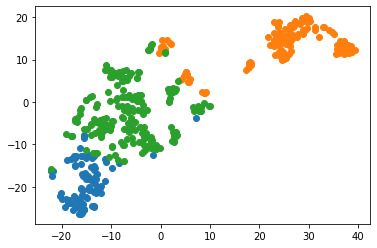

In [81]:
plt.scatter(X_train_tsne[train_labels == 0, 0], X_train_tsne[train_labels == 0, 1])
plt.scatter(X_train_tsne[train_labels == 1, 0], X_train_tsne[train_labels == 1, 1])
plt.scatter(X_train_tsne[train_labels == 2, 0], X_train_tsne[train_labels == 2, 1])

plt.show()

In [82]:
X_train.loc[train_labels == 0, 'CRIM'].mean()


0.07356558139534886

In [83]:
X_train.loc[train_labels == 1, 'CRIM'].mean()

10.797028425196853

In [85]:
X_train.loc[train_labels == 2, 'CRIM'].mean()

0.42166020942408367

In [89]:
y_train[train_labels == 0].mean()


27.78837209302326

In [90]:
y_train[train_labels == 1].mean()

16.165354330708663

In [91]:
y_train[train_labels == 2].mean()

24.958115183246072

### Задание 3

In [98]:
test_labels = model.fit_predict(X_test_scaled)

In [99]:
test_labels

array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1])

In [104]:
X_test.loc[test_labels == 0, 'CRIM'].mean()

0.08618571428571427

In [105]:
X_test.loc[test_labels == 1, 'CRIM'].mean()

0.25200716981132076

In [106]:
X_test.loc[test_labels == 2, 'CRIM'].mean()

10.165531142857143

In [108]:
y_test[test_labels == 0].mean()

33.871428571428574

In [109]:
y_test[test_labels == 1].mean()

21.552830188679245

In [110]:
y_test[test_labels == 2].mean()

16.43714285714286